## Итерационные методы решения СЛАУ
### Методы установления, Якоби, Зейделя, SOR. 
### Каноническая форма двухслойного итерационного метода

Цыбулин Иван ([tsybulin@crec.mipt.ru](mailto:tsybulin@crec.mipt.ru))

## Метод простой итерации
$$
\mathbf x_{k+1} = \mathbf {Bx}_{k} + \mathbf F
$$
* Сходится, если для какой-то согласованной матричной нормы
$\|\mathbf B\| = q < 1.$
* Сходится тогда и только тогда, когда
$
\rho(\mathbf B) = \max |\lambda(\mathbf B)| < 1
$
* Сходится к своей неподвижной точке $\mathbf x^*$, 
$
\quad\mathbf x^* = \mathbf {Bx}^* + \mathbf F
$


## Метод с параметром $\tau$
* Для системы $\mathbf {Ax} = \mathbf f$
* На каждой итерации к приближению $\mathbf x_k$ прибавляется его невязка $\mathbf r_k = \mathbf f - \mathbf {Ax}_k$, умноженная на некоторое число $\tau \neq 0$:
$$
\mathbf x_{k+1} = \mathbf x_k + \tau(\mathbf f - \mathbf {Ax}_k)\\
\mathbf x_{k+1} = \underbrace{(\mathbf E - \tau \mathbf A)}_{\mathbf B} \mathbf x_k + \underbrace{\tau \mathbf f}_{\mathbf F}
$$

Будем рассматривать случай $\mathbf A = \mathbf A^\top > 0$. Если это не так, систему можно *симметризовать*
$$
\mathbf {Ax} = \mathbf {f} \quad \Longrightarrow \quad \mathbf A^\top\mathbf {Ax} = \mathbf A^\top\mathbf {f}
$$

На практике стараются избегать симметризовать матрицу системы таким образом, поскольку при этом число обусловленности сильно возрастает
$$
\mu(\mathbf A^\top \mathbf A) \sim \mu(\mathbf A)^2
$$

## Сходимость метода с параметром
* Для симметричной $\mathbf A = \mathbf A^\top > 0$ матрица $\mathbf B = \mathbf E - \tau \mathbf A = \mathbf B^\top$.
* $\max |\lambda\mathbf(B)| = \max(|\lambda_{\min}(\mathbf B)|, |\lambda_{\max}(\mathbf B)|)$
* $\lambda(\mathbf B) = \lambda(\mathbf E - \tau \mathbf A) = 1 - \tau \lambda(\mathbf A)$

Пусть $\tau > 0$
$$
\lambda_{\min}(\mathbf B) = 1 - \tau \lambda_{\max}(\mathbf A)
\qquad
\lambda_{\max}(\mathbf B) = 1 - \tau \lambda_{\min}(\mathbf A)
$$

Скорость сходимости в Евклидовой норме
$$
q = \|\mathbf B\|_E = \max |\lambda(\mathbf B)| = \max(|1 - \tau\lambda_{\max}(\mathbf A)|, |1 - \tau\lambda_{\min}(\mathbf A)|)
$$
определяется параметром $\tau$ и границами спектра матрицы $\mathbf A$. Наивысшая скорость сходимости
$$
q_\text{opt} = \frac{\lambda_{\max}(\mathbf A) - \lambda_{\min}(\mathbf A)}{\lambda_{\max}(\mathbf A) + \lambda_{\min}(\mathbf A)} = \frac{1 - \mu_E(\mathbf A)}{1 + \mu_E(\mathbf A)}, \qquad
\tau_\text{opt} = \frac{2}{\lambda_{\max}(\mathbf A) + \lambda_{\min}(\mathbf A)}
$$

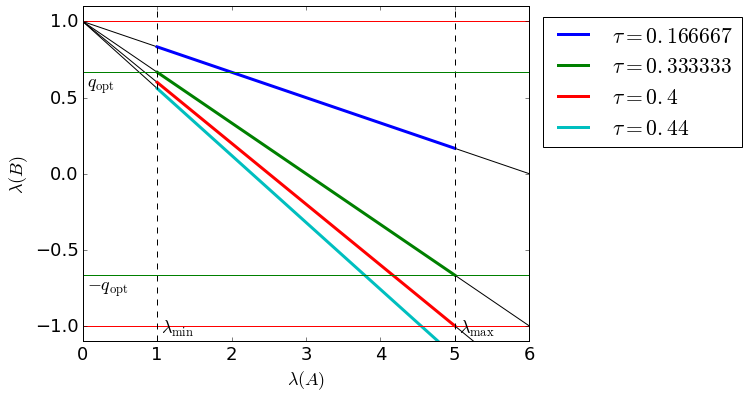

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 18})

lmin = 1
lmax = 5
lamA = np.linspace(lmin, lmax, 20)
tau_opt = 2 / (lmin + lmax)
tau_max = 2 / lmax
taus = [tau_opt / 2, tau_opt, tau_max, 1.1 * tau_max]
q_opt = (lmax - lmin) / (lmax + lmin)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
for tau in taus:
    ax.plot([0, lmax+1], [1, 1 - tau * (lmax+1)], 'k')
    ax.plot(lamA, 1 - tau * lamA, lw=3, label = '$\\tau = %g$' % tau)
ax.plot([0, lmax+1], [1, 1], 'r-')
ax.plot([0, lmax+1], [-1, -1], 'r-')
ax.plot([lmin, lmin], [-1.1, 1.1], 'k--')
ax.plot([lmax, lmax], [-1.1, 1.1], 'k--')
ax.plot([0, lmax+1], [q_opt, q_opt], 'g-')
ax.plot([0, lmax+1], [-q_opt, -q_opt], 'g-')
ax.annotate('$q_\\operatorname{opt}$', (0.05, q_opt-0.1))
ax.annotate('$-q_\\operatorname{opt}$', (0.05, -q_opt-0.1))
ax.annotate('$\\lambda_\\operatorname{min}$', (lmin+0.05, -1.05))
ax.annotate('$\\lambda_\\operatorname{max}$', (lmax+0.05, -1.05))

ax.set_xlim([0, lmax+1])
ax.set_ylim([-1.1, 1.1])
ax.set_xlabel('$\\lambda(A)$')
ax.set_ylabel('$\\lambda(B)$')
ax.legend(bbox_to_anchor=(1.5, 1))
plt.show()

## Оценки сходимости
Пусть в некоторой норме $\|\mathbf B\| = q < 1$. Тогда в этой норме
$$\|\mathbf e_n\| \leqslant q^n \|\mathbf e_0\|$$
Эта оценка показывает, во сколько раз уменьшается норма погрешности за $n$ итераций.
$$\|\mathbf e_n\| \leqslant \frac{q^n}{1-q} \|\mathbf x_{1} - \mathbf x_0\|$$
Эта оценка позволяет оценить саму норму ошибки через $n$ итераций.

Пусть нас интересует число итераций, после которых норма ошибки уменьшится в $10^6$ раз. Тогда из первой формулы
$$\|\mathbf e_n\| \leqslant q^n \|\mathbf e_0\|$$
достаточно взять
$$
n > \log_q \frac{\|\mathbf e_n\|}{\|\mathbf e_0\|} = \frac{\ln \|\mathbf e_n\| - \ln \|\mathbf e_0\|}{\ln q}.
$$
Если $q$ достаточно близко к единице, можно использовать $\ln q \approx q - 1$

Пусть нас интересует число итераций, после которых норма ошибки станет $10^{-6}$. Тогда из второй формулы
$$\|\mathbf e_n\| \leqslant \frac{q^n}{1-q} \|\mathbf x_1 - \mathbf x_0\|$$
достаточно взять
$$
n > \log_q \frac{(1-q)\|\mathbf e_n\|}{\|\mathbf x_1 - \mathbf x_0\|} = \frac{\ln (1-q) + \ln \|e_n\| - \ln \|\mathbf x_1 - \mathbf x_0\|}{\ln q}.
$$
Для этой оценки необходимо сначала сделать одну итерацию метода, чтобы получить $\mathbf x_1$.

## Метод Якоби
Представим матрицу системы в виде суммы ее диагональной части и остатка:
$$
\mathbf A = \begin{pmatrix}
a_{11} & a_{12} & \dots & a_{1n}\\
a_{21} & a_{22} & \dots & a_{2n}\\
\vdots &\vdots & \ddots &\vdots \\
a_{n1} & a_{n2} & \dots & a_{nn}
\end{pmatrix}
= \underbrace{\begin{pmatrix}
a_{11} & 0 & \dots & 0\\
0 & a_{22} & \dots & 0\\
\vdots &\vdots & \ddots &\vdots \\
0 & 0 & \dots & a_{nn}
\end{pmatrix}}_{\mathbf D} + \underbrace{\begin{pmatrix}
0 & a_{12} & \dots & a_{1n}\\
a_{21} & 0 & \dots & a_{2n}\\
\vdots &\vdots & \ddots &\vdots \\
a_{n1} & a_{n2} & \dots & 0
\end{pmatrix}}_{\mathbf A - \mathbf D}
$$

$$
\mathbf {Ax} = \mathbf f \Longrightarrow \mathbf {Dx} + (\mathbf A - \mathbf D)\mathbf{x} = \mathbf f
$$

Рассмотрим уравнение
$$
\mathbf{Dx} = \mathbf f + (\mathbf D - \mathbf A)\mathbf{x}
$$
как неподвижную точку итерационного процесса
$$
\mathbf{Dx}_{k+1} = \mathbf f + (\mathbf D - \mathbf A)\mathbf{x}_{k}.
$$

Этот же процесс можно записать в виде
$$
\mathbf x_{k+1} = \mathbf x_k + \mathbf{D}^{-1} \mathbf r_k \equiv 
\mathbf x_k + \mathbf{D}^{-1} \mathbf (\mathbf f - \mathbf {Ax}_k).
$$

Метод Якоби гарантированно сходится для матриц со строгим диалгональным преобладанием.
$$
\mathbf B = \mathbf E - \mathbf D^{-1} \mathbf A = 
\begin{pmatrix}
0 & -\frac{a_{12}}{a_{11}} & \dots & -\frac{a_{1n}}{a_{11}} \\
\vdots & \vdots &  \vdots &\vdots\\
-\frac{a_{n1}}{a_{nn}} & -\frac{a_{n2}}{a_{nn}} & \dots & 0
\end{pmatrix}
$$

$$
\|\mathbf B\|_\infty = \max_i \sum_{j\neq i} \frac{|a_{ij}|}{|a_{ii}|} = 
\max_i \left(\frac{1}{|a_{ii}|}\sum_{j\neq i} |a_{ij}|\right) < 1
$$
Этого *достаточно* для сходимости метода Якоби.

Необходимым и достаточным условием сходимости будет условие $\rho(\mathbf B) = \max |\lambda(\mathbf B)|< 1$. Заметим, что
$$
\det (\mathbf B - \lambda \mathbf E) = 
\det (\mathbf E - \mathbf D^{-1} \mathbf A - \lambda E) = 
-\det \mathbf D^{-1} \det (\mathbf A - \mathbf D + \lambda \mathbf D).
$$
Таким образом, собственные значения матрицы $\mathbf B$ удовлетворяют уравнению
$$
\begin{vmatrix}
a_{11} \lambda & a_{12} & \dots & a_{1n}\\
a_{21} & a_{22}\lambda & \dots & a_{2n}\\
\vdots &\vdots & \ddots &\vdots \\
a_{n1} & a_{n2} & \dots & a_{nn}\lambda
\end{vmatrix} = 0
$$

In [ ]:
def jacobi(A, f, x0, eps=1e-6, maxiter=1000):
    x = x0.copy()
    dx = np.zeros_like(f)
    it = 0
    n = len(x)
    while it < maxiter:
        it += 1  
        r = f - A.dot(x)
        for i in range(n):
            dx[i] = r[i] / A[i, i]
        x = x + dx
        if np.linalg.norm(r) < eps:
            return x, it
    raise RuntimeError('Maximum number of iterations exceeded')

In [ ]:
n = 10
A = np.random.rand(n, n) # берем случаную матрицу
A = A + np.diag(A.sum(axis=1)) # и делаем ей диагональное преобладание
x = np.ones(n) # точное решение
f = A.dot(x)
x0 = np.zeros_like(x)
xres, it = jacobi(A, f, x0)
print('Done in %d iterations' % it)
print('||x - x_res|| =', np.linalg.norm(xres - x))

Done in 137 iterations
||x - x_res|| = 8.23193943958e-08


## Метод Зейделя
В методе Зейделя матрица разбивается в сумму трех
$$
\mathbf {Ax} = \mathbf f \Longrightarrow 
(\mathbf {L} + \mathbf {D})\mathbf {x} + \mathbf {Ux} = \mathbf f.
$$
Здесь $\mathbf L, \mathbf U$ &mdash; треугольные матрицы из поддиагональных и наддиагональных элементов соответственно. Обратите внимание, эти матрицы не имеют отношения к LU разложению матрицы системы.

Итерационный процесс Зейделя имеет вид
$$
(\mathbf {L} + \mathbf {D})\mathbf {x}_{k+1} = \mathbf f - \mathbf {Ux}_k.
$$

Для определения вектора $\mathbf x_{k+1}$ необходимо *на каждой итерации* решать систему с треугольной матрицей 
$\mathbf L + \mathbf D$, что делается прямой подстановкой. Отметим, что метод можно записать в форме
$$
\mathbf x_{k+1} = \mathbf x_k + (\mathbf L + \mathbf D)^{-1} \mathbf r_k
$$

Метод Зейделя гарантированно сходится для положительно определенных симметричных матриц.

Для метода Зейделя собственные числа матрицы $\mathbf B$ можно определить из похожего уравнения
$$
\begin{vmatrix}
a_{11} \lambda & a_{12} & \dots & a_{1n}\\
a_{21} \lambda& a_{22}\lambda & \dots & a_{2n}\\
\vdots &\vdots & \ddots &\vdots \\
a_{n1} \lambda& a_{n2}\lambda & \dots & a_{nn}\lambda
\end{vmatrix} = 0
$$
Здесь все элементы матрицы $\mathbf A$ на диагонали и под ней умножены на $\lambda$.

Запишем метод Зейделя в компонентной форме. Будем обозначать верхним индексом номер итерации
$$
a_{11} \color{red}{x_1^{(k+1)}} + a_{12} x_2^{(k)} + a_{13} x_2^{(k)} + \dots + a_{1n} x_n^{(k)} = f_1\\
a_{21} \color{blue}{x_1^{(k+1)}} + a_{22} \color{red}{x_2^{(k+1)}} + a_{23} x_2^{(k)} + \dots + a_{1n} x_n^{(k)} = f_2\\
a_{31} \color{blue}{x_1^{(k+1)}} + a_{32} \color{blue}{x_2^{(k+1)}} + a_{33} \color{red}{x_2^{(k+1)}} + \dots + a_{1n} x_n^{(k)} = f_3\\
\vdots\\
a_{n1} \color{blue}{x_1^{(k+1)}} + a_{32} \color{blue}{x_2^{(k+1)}} + a_{33} \color{blue}{x_2^{(k+1)}} + \dots + a_{1n} \color{red}{x_n^{(k+1)}} = f_n\\
$$

Если решать уравнения сверху вниз, в каждом уравнении единственной неизвестной величиной является диагональная неизвестная.

In [ ]:
def seidel(A, f, x0, eps=1e-6, maxiter=1000):
    x = x0.copy()
    n = len(x)
    it = 0
    while it < maxiter:
        it += 1
        for i in range(n):
            Lx = 0 # суммируем начало строки до i-го элемента
            for j in range(i):
                Lx += A[i, j] * x[j] # Здесь x - x_{k+1}
            Ux = 0 # суммируем конец строки с i+1-го элемента
            for j in range(i+1, n):
                Ux += A[i, j] * x[j] # Здесь x - x_k
            # Заменяем диагональный элемент, старый нам уже не понадобится
            x[i] = (f[i] - Lx - Ux) / A[i, i]
        r = f - A.dot(x)
        if np.linalg.norm(r) < eps:
            return x, it
    raise RuntimeError('Maximum number of iterations exceeded')    

In [ ]:
n = 10
A = np.random.rand(n, n)
# Делаем случайную симметричную матрицу
A = A.T.dot(A) 
# Добавим немного единичной матрицы для лучшей обусловленности A
A = 0.1 * np.eye(n) + A

x = np.ones(n)
f = A.dot(x)
x0 = np.zeros_like(x)
xres, it = seidel(A, f, x0)
print('Done in %d iterations' % it)
print('||x - x_res|| =', np.linalg.norm(xres - x))

Done in 232 iterations
||x - x_res|| = 2.6383794071e-06


## Метод SOR
Метод SOR (метод релаксации) является модификацией метода Зейделя. В нем имеется параметр релаксации $\omega \in (0, 2)$:
$$
\left(\mathbf L + \frac{1}{\omega}\mathbf D\right) \mathbf x_{k+1}
= \mathbf f - \left(\mathbf U + \frac{\omega - 1}{\omega}\mathbf D\right) \mathbf x_{k}.
$$
При $\omega = 1$ метод совпадает с методом Зейделя. Метод допускает представление в виде
$$
\mathbf x_{k+1} = \mathbf x_k + \left(\mathbf L + \frac{1}{\omega}\mathbf D\right)^{-1} \mathbf r_k
$$

Метод SOR сходится для систем с положительно определенной симметричной матрицей (как и метод Зейделя). Определение оптимального параметра $\omega$ является нетривиальной задачей. Для трехдиагональных матриц оптимальное значение $\omega$ дается выражением
$$
\omega_\text{opt} = \frac{2}{1+\sqrt{1 - \rho^2(\mathbf B_\text{Якоби})}}
$$

In [ ]:
def sor(A, f, x0, omega, eps=1e-6, maxiter=1000):
    x = x0.copy()
    n = len(x)
    it = 0
    while it < maxiter:
        it += 1
        for i in range(n):
            Lx = 0 # суммируем начало строки до i-го элемента
            for j in range(i):
                Lx += A[i, j] * x[j] # Здесь x - x_{k+1}
            Ux = 0 # суммируем конец строки с i+1-го элемента
            for j in range(i+1, n):
                Ux += A[i, j] * x[j] # Здесь x - x_k
            # Заменяем диагональный элемент, старый нам уже не понадобится
            x[i] = x[i] + omega * ((f[i] - Lx - Ux) / A[i, i] - x[i])
        r = f - A.dot(x)
        if np.linalg.norm(r) < eps:
            return x, it
    raise RuntimeError('Maximum number of iterations exceeded') 

In [ ]:
n = 30
A = np.diag(2.001 * np.ones(n)) - np.diag(np.ones(n-1), k=-1) - np.diag(np.ones(n-1), k=1)
D = np.diag(np.diag(A))
B_J = np.linalg.solve(D, A - D)
rho_B_J = np.abs(np.linalg.eigvals(B_J)).max()
omega = 2 / (1 + np.sqrt(1 - rho_B_J**2))

x = np.ones(n)
f = A.dot(x)
x0 = np.zeros_like(x)
xres, it = seidel(A, f, x0)
xres2, it2 = sor(A, f, x0, omega)
print('Seidel done in %d iterations' % it)
print('SOR done in %d iterations' % it2)
print('Seidel ||x - x_res|| =', np.linalg.norm(xres - x))
print('SOR ||x - x_res|| =', np.linalg.norm(xres2 - x))

Seidel done in 971 iterations
SOR done in 77 iterations
Seidel ||x - x_res|| = 8.76532826947e-05
SOR ||x - x_res|| = 2.01191621378e-05


## Каноническая форма
Все перечисленные методы были двухслойными, то есть для вычисления нового приближения $\mathbf x_{k+1}$ требовалось знать лишь предыдущее приближение $\mathbf x_k$. Более того, итерацию каждого метода можно представить в виде схемы
$$
\mathbf x_k  \overset{\mathbf r = \mathbf f - \mathbf A \mathbf x}{\longrightarrow} \mathbf r_k
\overset{\mathbf P \Delta \mathbf x = \mathbf r}{\longrightarrow} \Delta  \mathbf  x_k \overset{\mathbf x_{k+1} = \mathbf x_k + \Delta  \mathbf x_k}{\longrightarrow} \mathbf x_{k+1}
$$

Запишем эту схему в форме
$$
\mathbf x_{k+1} = \mathbf x_k + \mathbf P^{-1} \mathbf r_k \equiv \mathbf x_k + \mathbf P^{-1} (\mathbf f - \mathbf {Ax}_k)
$$
или
$$
\mathbf P (\mathbf x_{k+1} - \mathbf x_k) = \mathbf f - \mathbf {Ax}_k.
$$
Матрица $\mathbf P$ называется *предобуславливателем*.

$$
\mathbf P (\mathbf x_{k+1} - \mathbf x_k) = \mathbf f - \mathbf {Ax}_k.
$$
Матрица $\mathbf P$ должна удовлетворять следующим требованиям
* Система относительно $\Delta \mathbf x_k = \mathbf x_{k+1} - \mathbf x_k$ с матрицей $\mathbf P$ должна решаться сравнительно просто
* Выбор хорошей матрицы $\mathbf P$ должен ускорять сходимость итераций

### Стандартные предобуславливатели
Для рассмотренных методов предобуславливателями были
* Метод с параметром $\tau$:  $\mathbf P = \frac{1}{\tau}\mathbf E$
* Метод Якоби: $\mathbf P = \mathbf D$
* Метод Зейделя: $\mathbf P = \mathbf L + \mathbf D$
* Метод SOR: $\mathbf P = \mathbf L + \frac{1}{\omega}\mathbf D$

Матрица итераций $\mathbf B$ простым образом связана с предобуславливателем $\mathbf P$:
$$
\mathbf x_{k+1} = \mathbf x_k + \mathbf P^{-1} (\mathbf f - \mathbf {Ax}_k) = 
(\underbrace{\mathbf E - \mathbf P^{-1} \mathbf A}_{\mathbf B}) \mathbf x_{k} + \mathbf P^{-1} \mathbf f.
$$
Видно, что идеальная сходимость (за одну итерацию) наступает при $\mathbf P = \mathbf A$. Однако систему с такой матрицей решить просто не получится. Поэтому для итерационных методов стараются выбирать $\mathbf P \approx \mathbf A$.

### Критерий сходимости в канонической форме
Запишем уравнение для $\lambda(\mathbf B)$ в форме, содержащей лишь матрицы $\mathbf A, \mathbf P$:
$$
\det (\mathbf B - \lambda \mathbf E) = 
\det (\mathbf E - \mathbf P^{-1} \mathbf A - \lambda \mathbf E) =
-\det \mathbf P^{-1} \det (\mathbf A - \mathbf P + \lambda \mathbf P).
$$
Таким образом, собственные значения $\mathbf B$ можно найти из уравнения
$$
\det (\mathbf A - \mathbf P + \lambda \mathbf P) = 0.
$$